<a href="https://colab.research.google.com/github/lauren-esser/Better-Stock-Market-Prediction/blob/master/Capstone11_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Submission:

**Student Name:** Lauren Esser

**Student Pace:** Full Time

**Scheduled Project Review Date/Time:**  

**Instructor Name:** James Irving

**Blog Post URLS:**  https://lauren-esser.github.io/how_to_use_newsapi and 

#Abstract

An Abstract section that briefly explains your problem, your methodology, and your findings, and business recommendations as a result of your findings. This section should be 1-2 paragraphs long.


#Import

In [1]:
#set numpy random seed
import numpy as np
np.random.seed(1919)

In [2]:
#set tensor random seed
import tensorflow as tf
tf.random.set_seed(1919)

In [3]:
#then import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os, glob
from statsmodels.tsa.stattools import adfuller
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import FreqDist
from nltk.collocations import *
from keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras import optimizers 
from tensorflow.keras.regularizers import l2
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#connect to google drive
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [5]:
%cd ~
%cd ..

/root
/


In [6]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

archive.zip		      IVE_tickbidask.txt
chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json


In [7]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['etc',
 'root',
 'media',
 'lib64',
 'srv',
 'home',
 'sys',
 'boot',
 'tmp',
 'lib',
 'opt',
 'var',
 'usr',
 'sbin',
 'run',
 'dev',
 'proc',
 'bin',
 'mnt',
 'gdrive',
 'News_Category_Dataset_v2.json',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'content',
 'lib32']

#Obtain

Obtain Stocks Dataset:
1. Go to http://www.kibot.com/free_historical_data.aspx
2. Scroll to bottom of page and download "Tick with bid/ask data" under IVE(S&P 500 Value Index) 
3. Upload to Google drive
4. Follow below steps

In [8]:
#import and assign txt file
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'IVE_tickbidask.txt', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/IVE_tickbidask.txt'

In [9]:
#define and view txt file
stocks = pd.read_csv(file, header = None)
stocks.head()

,0,1,2,3,4,5
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100


In [10]:
#rename column headers
stocks = stocks.rename(columns={0: 'Date', 1:'Time', 2: 'Price', 3:'Bid',
                                4: 'Ask', 5:'Size'})
stocks

,Date,Time,Price,Bid,Ask,Size
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
8467941,11/05/2020,16:10:00,116.57,114.01,120.25,0
8467942,11/05/2020,16:25:33,116.35,114.68,118.73,900
8467943,11/05/2020,16:25:33,115.68,114.68,118.73,795
8467944,11/05/2020,18:30:00,116.57,114.54,118.40,0


#### News API: Can only access up to one month of news headlines for free

In [ ]:
#pip install newsapi-python

In [ ]:
# from newsapi import NewsApiClient

In [ ]:

# connect with API key
# newsapi = NewsApiClient(api_key = '')

In [ ]:
#identify news source options
# news_sources = newsapi.get_sources()
# news_sourcecs_list = []
# for sources in news_sources['sources']:
#   news_sourcecs_list.append(sources['name'])
#   print(sources['name'])

In [ ]:
# #test out newsapi.get_everything for specific date
# date = '2020-11-01'
# news_headlines_everything = newsapi.get_everything('&from = (date)', '&to = (date1)', language = 'en')
                                                
# news_titles_everything = []
# for article in news_headlines_everything['articles']:
#   news_titles_everything.append(article['title'])
#   print(article['title'])

In [ ]:
# #create empty list
# news_titles = []

# #create function
# def get_news_titles(date):
#   '''Used to get a list of 20 news titles from usatoday on date specified via newsapi.org.

#   Args: date = desired date

#   Returns: List of 20 news articles from the specified date with the date listed after

#   Example: get_news_titles('2020-11-01')'''
  
#   date = date
#   news_headlines_everything = newsapi.get_everything(from_param = (date), to = (date), language = 'en', domains = 'usatoday.com')
#   for article in news_headlines_everything['articles']:
#     news_titles.append([article['title'], date])
#     #print(article['title'])
#     #return news_titles

In [ ]:
# get_news_titles('2020-11-01')

In [ ]:
# news_titles

In [ ]:
# get_news_titles('2020-10-25')
# news_titles

In [ ]:
# len(news_titles)

In [ ]:
# # sunday_news = ['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02', 
#                '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
#                '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
#                '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
#                '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
#                '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', 
#                '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
#                '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04', 
#                '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01']

In [ ]:
# for date in sunday_news:
#   new = get_news_titles(date)
#   news_titles.append(new)
# return news_titles

In [ ]:
#newsapi.get_top_headlines for today
# news_headlines = newsapi.get_top_headlines(language = 'en', country = 'us')
# news_titles = []
# for article in news_headlines['articles']:
#   news_titles.append(article['title'])
#   print(article['title'])

#### Obtain News Dataset

News Category Dataset from Kaggle:
1. Go to https://www.kaggle.com/rmisra/news-category-dataset
2. Download dataset to your computer
3. Upload dataset into your Google Drive folder
4. Follow steps below

In [ ]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

In [ ]:
print(os.path.abspath(os.curdir))
os.listdir()

In [ ]:
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'archive.zip', recursive = True)
file = file[0]
file

In [ ]:
#upzip data
zip_path = file
!cp '{zip_path}' .

!unzip -q archive.zip
!rm archive.zip

In [ ]:
#open file for viewing
news = pd.read_json('/gdrive/My Drive/Colab Notebooks/DataSets/News_Category_Dataset_v2.json', lines = True)

In [ ]:
news.head(20)

#Scrub

### Scrubbing Stocks

In [11]:
#check nulls
stocks.isna().sum()

Date     0
Time     0
Price    0
Bid      0
Ask      0
Size     0
dtype: int64

In [12]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Time    object 
 2   Price   float64
 3   Bid     float64
 4   Ask     float64
 5   Size    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 387.6+ MB


In [13]:
#convert date to a datetime column
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [14]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
 2   Price   float64       
 3   Bid     float64       
 4   Ask     float64       
 5   Size    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 387.6+ MB


In [15]:
#set date to index
stocks.set_index('Date', inplace= True)

In [16]:
stocks.index

DatetimeIndex(['2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28',
               ...
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05'],
              dtype='datetime64[ns]', name='Date', length=8467946, freq=None)

In order to make sure we are looking at the same time frame for both stocks and news articles, I will slice and save the correct dates for stocks to correspond to the news articles: 2012-01-28 to 2018-05-26 for later use.


In [17]:
#slice dates
stocks = stocks['2012-01-28': '2018-05-26']
stocks.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,09:08:30,61.00,60.16,60.61,2119
2012-01-30,09:30:00,60.37,60.37,60.45,159
2012-01-30,09:30:00,60.38,60.38,60.43,100
2012-01-30,09:30:06,60.36,60.31,60.42,400
2012-01-30,09:30:17,60.30,60.29,60.39,150


In [18]:
#resample stocks to business day frequency
stocks = stocks.resample('B').last()
stocks.head()

,Time,Price,Bid,Ask,Size
Date,,,,,
2012-01-30,16:00:00,60.73,60.71,60.73,174.0
2012-01-31,16:00:05,60.66,60.65,60.65,600.0
2012-02-01,16:01:35,61.33,61.33,61.38,1200.0
2012-02-02,16:00:03,61.46,61.46,61.47,200.0
2012-02-03,16:00:00,62.50,62.51,62.52,1378.0


In [19]:
#check for duplicates
stocks.duplicated().sum()

57

In [20]:
#drop duplicates
stocks.drop_duplicates(keep='last', inplace=True)

In [21]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 2012-01-30 to 2018-05-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1592 non-null   object 
 1   Price   1592 non-null   float64
 2   Bid     1592 non-null   float64
 3   Ask     1592 non-null   float64
 4   Size    1592 non-null   float64
dtypes: float64(4), object(1)
memory usage: 74.7+ KB


In [24]:
#check nulls
stocks.ffill(inplace = True)

In [25]:
stocks.isna().sum()

Time     0
Price    0
Bid      0
Ask      0
Size     0
dtype: int64

### Scrubbing News

In [ ]:
#end date
news.date.max()

In [ ]:
#start date
news.date.min()

In [ ]:
news.head()

In [ ]:
news.info()

In [ ]:
news.nunique()

In [ ]:
#check diff categories
news.category.value_counts()

In [ ]:
#set index to date
news.set_index('date', inplace= True)

In [ ]:
news.head(20)

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import string

In [ ]:
#create stopwords list
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)

In [ ]:
#identify patterns to exclude
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

#create empty list
news_tokens = []

#iterate through headlines
for headline in news.headline:
  tokens = nltk.regexp_tokenize(headline, pattern)
  stopped_token = [w.lower() for w in tokens if w.lower() not in stopwords]
  stopped_token = " ".join(stopped_token)
  news_tokens.append(stopped_token)
  news['clean'] = stopped_token

In [ ]:
news.head()

In [ ]:
news_tokens[:200]

In [ ]:
#join into one string
news_tokens = " ".join(news_tokens)
news_tokens

In [ ]:
#tokenize final set
final_tokenize = word_tokenize(news_tokens)
final_tokenize[:50]

In [ ]:
#remove 's from list
final_tokenize = list(filter(lambda x: x != "'s", final_tokenize))

In [ ]:
final_tokenize = list(filter(lambda x: x != "u", final_tokenize))

In [ ]:
# from nltk import FreqDist


In [ ]:
#identify top 50 most freq words
freqdist = FreqDist(final_tokenize)
most_common = freqdist.most_common(50)
most_common

In [ ]:
#normlized word frequency of top 50
total_word_count = sum(freqdist.values())
most_common = freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in most_common:
  normalized_frequency = word[1] / total_word_count
  print('{}\t\t\t{:.4}'.format(word[0], normalized_frequency))

In [ ]:
#from nltk.collocations import *

In [ ]:
#create bigram to show word association
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_finder = BigramCollocationFinder.from_words(final_tokenize)
news_scored = news_finder.score_ngrams(bigram_measures.raw_freq)
news_scored[:50]

In [ ]:
#create mutual information scores
news_pmi_finder = BigramCollocationFinder.from_words(final_tokenize)
news_pmi_finder.apply_freq_filter(5)
news_pmi_scored = news_pmi_finder.score_ngrams(bigram_measures.pmi)
news_pmi_scored[:50]

#Explore

### Stocks Exploration

###### Line Plot

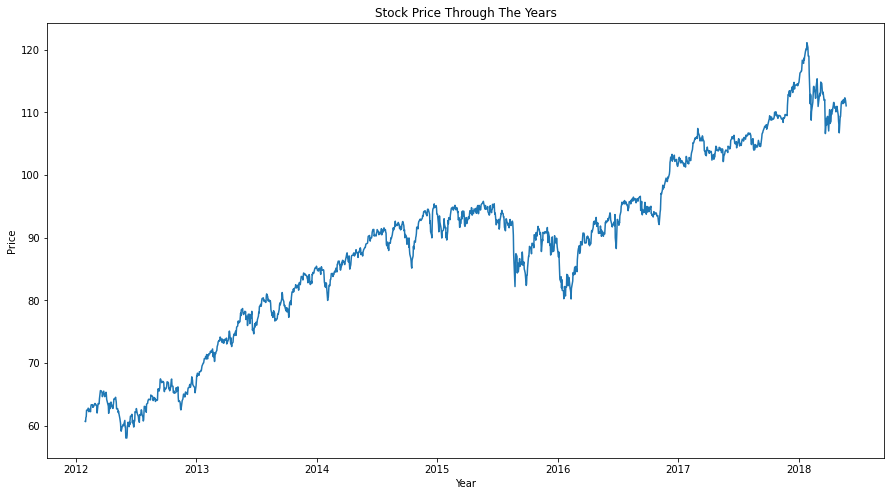

In [26]:
#line plot of stocks price over the years
fig = plt.figure(figsize = (15, 8))
plt.plot(stocks['Price'])
plt.title('Stock Price Through The Years')
plt.ylabel('Price')
plt.xlabel('Year');


---

###### Dot Plot

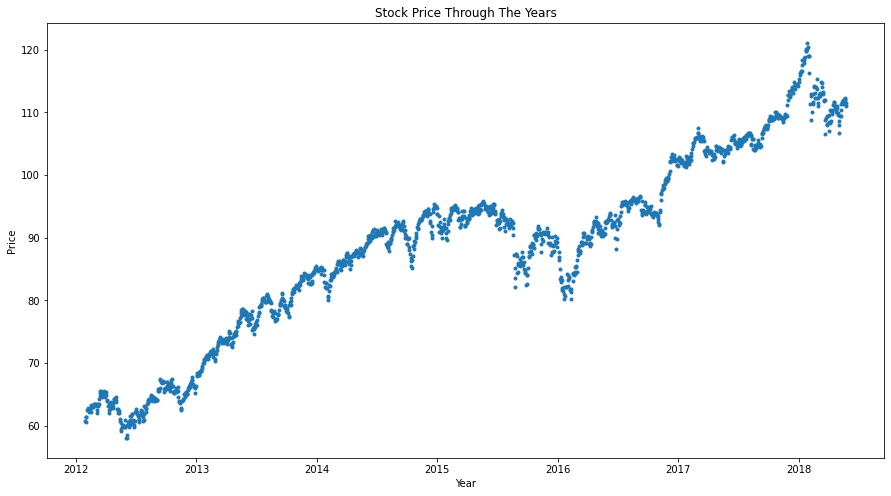

In [27]:
#dot plot of stocks price over the years
fig = plt.figure(2, figsize = (15, 8))
plt.plot(stocks['Price'], '.')
plt.title('Stock Price Through The Years')
plt.ylabel('Price')
plt.xlabel('Year');


---

###### Rolling Statistics

In [28]:
#identify rolling mean and rolling standard deviation
roll_mean = stocks['Price'].rolling(window = 90, center = False).mean()
roll_std = stocks['Price'].rolling(window = 90, center = False).std()

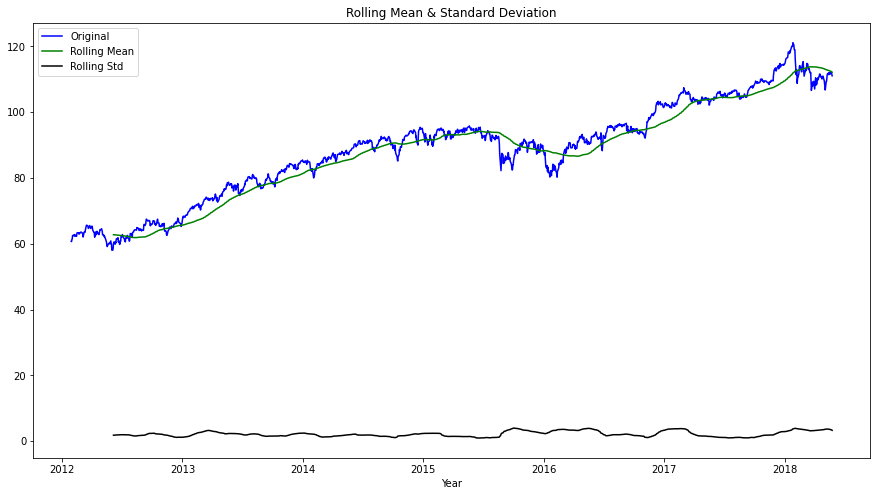

In [29]:
#visualize rolling mean, rolling std, and original
fig = plt.figure(figsize = (15, 8))
plt.plot(stocks['Price'], color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'green', label = 'Rolling Mean')
plt.plot(roll_std, color = 'black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.show()

---

###### The Dickey-Fuller Test

In [30]:
dftest = adfuller(stocks['Price'])

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used',
                                           'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Values (%s)' %key] = value
print(dftest)

(-1.1169362158182274, 0.7082708993443256, 5, 1587, {'1%': -3.43447722667209, '5%': -2.86336292616561, '10%': -2.567740491497354}, 3373.5166713832914)


In [31]:
print('Results of Dicky-Fuller test: \n')

print(dfoutput)

Results of Dicky-Fuller test: 

Test Statistic                   -1.116936
p-value                           0.708271
#Lags Used                        5.000000
Number of Observations Used    1587.000000
Critical Values (1%)             -3.434477
Critical Values (5%)             -2.863363
Critical Values (10%)            -2.567740
dtype: float64


**Summary:**
- Not a stationary series
- Linear upward trend
- Slight drop near the end of 2015.


---

###### Histograms

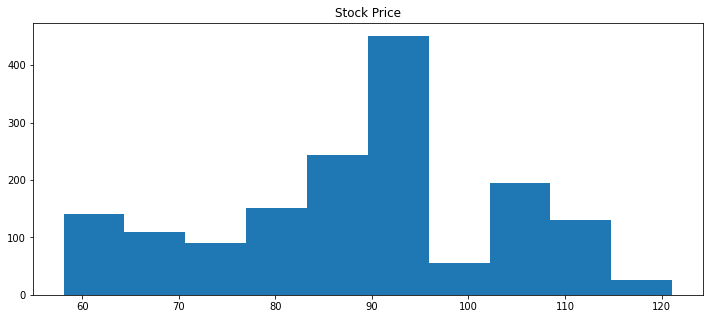

In [32]:
#build histogram to check distribution
fig, ax = plt.subplots(figsize = (12, 5))
ax.hist(stocks['Price'])
ax.set_title('Stock Price')
plt.show()

###### Density Plot

Text(0.5, 1.0, 'Density Plot of Stock Price')

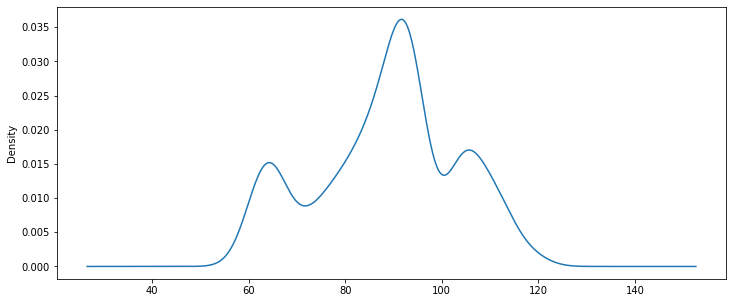

In [33]:
#build density plot to check distribution
stocks['Price'].plot(kind = 'kde', figsize = (12, 5));
ax.set_title('Density Plot of Stock Price')

#### Eliminating the trend

##### Square Root Transform

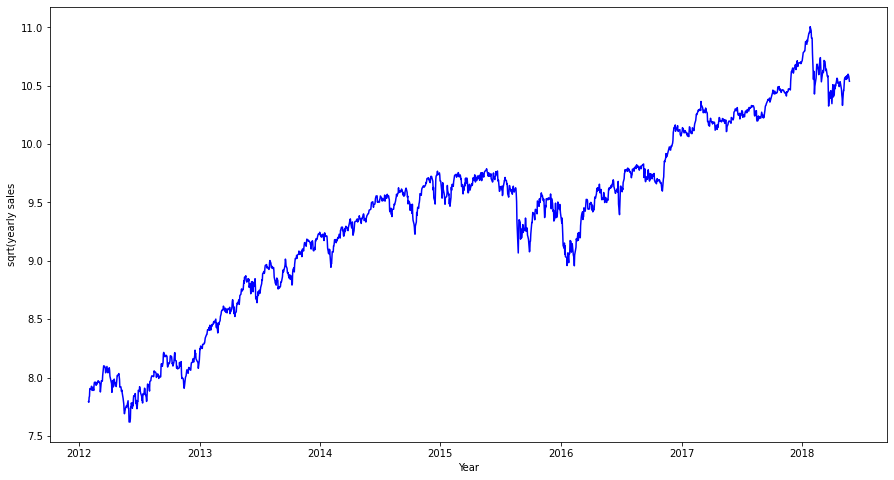

In [34]:
data = pd.Series(np.sqrt(stocks['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('sqrt(yearly sales')
plt.show()

##### Log Transformation

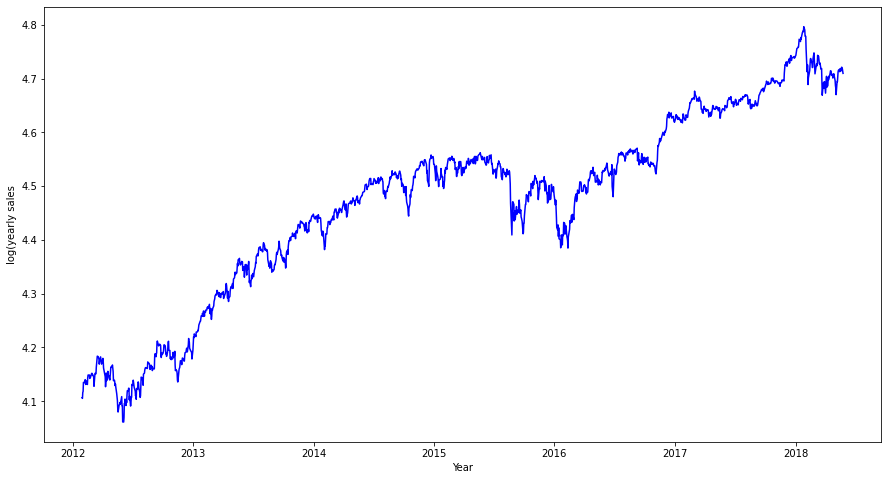

In [35]:
data = pd.Series(np.log(stocks['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('log(yearly sales')
plt.show()

##### Differencing


In [36]:
data_diff = data.diff(periods = 1)
data_diff.head()

Date
2012-01-30         NaN
2012-01-31   -0.001153
2012-02-01    0.010985
2012-02-02    0.002117
2012-02-03    0.016780
Name: Price, dtype: float64

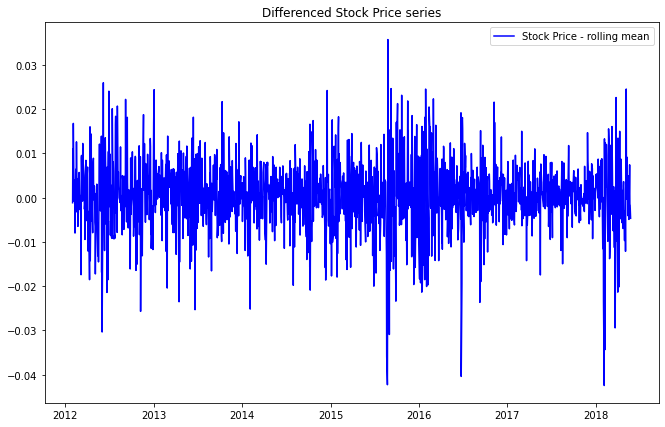

In [37]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Stock Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Stock Price series')
plt.show(block=False)

In [38]:
data_diff = data.diff().dropna()
data_diff.head()

Date
2012-01-31   -0.001153
2012-02-01    0.010985
2012-02-02    0.002117
2012-02-03    0.016780
2012-02-06   -0.000800
Name: Price, dtype: float64

### News Exploration

In [ ]:
fig = plt.figure(figsize = (15, 8))
g = sns.displot(news.category, height = 5, aspect = 2)
g.set_xticklabels(rotation = 80)
plt.title('Headline Count of Each Genre');

In [ ]:
news['year'] = news.index.to_series().apply(lambda x: x.year)

In [ ]:
news.head()

In [ ]:
sns.displot(news.year)
plt.title('Headline Count per Year');

PLOT MOST COMMON WORDS HERE

#Model

## Stocks Time Series Models

##### Random Walk Model
- no specified mean or variance
- a strong dependence over time

In [39]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'B')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  cum_error = np.cumsum(error)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value = random_walk(61, error)

shares_series = pd.Series(share_value, index = work)

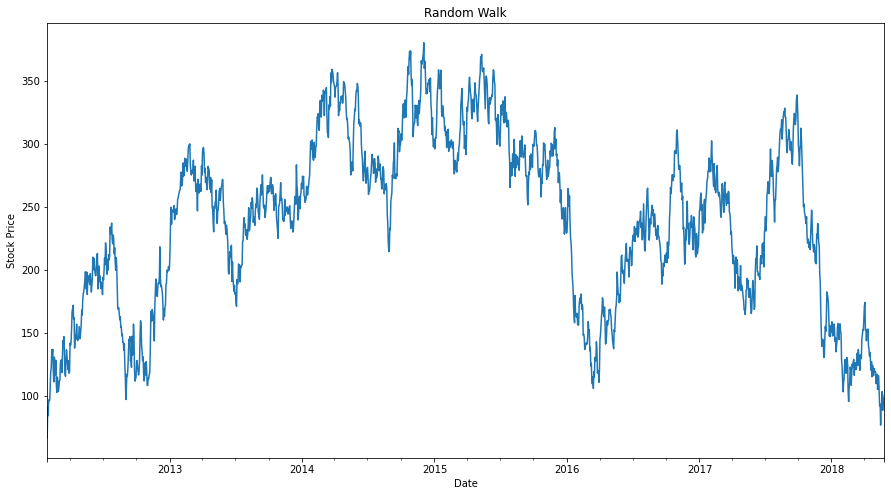

In [40]:
#plt random walk visualization
ax = shares_series.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk')
plt.show()

##### Random Walk with a Drift

In [41]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'B')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  #add drift of 8
  cum_error = np.cumsum(error + 8)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value_drift = random_walk(61, error)

shares_series_diff = pd.Series(share_value_drift, index = work)

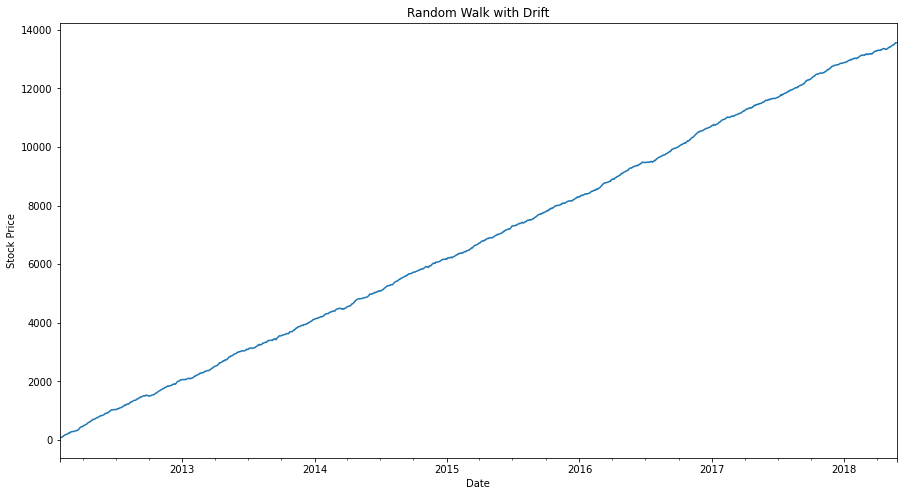

In [42]:
#plot random walk with drift visualization
ax = shares_series_diff.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk with Drift')
plt.show()

##### Differencing in a Random Walk Model

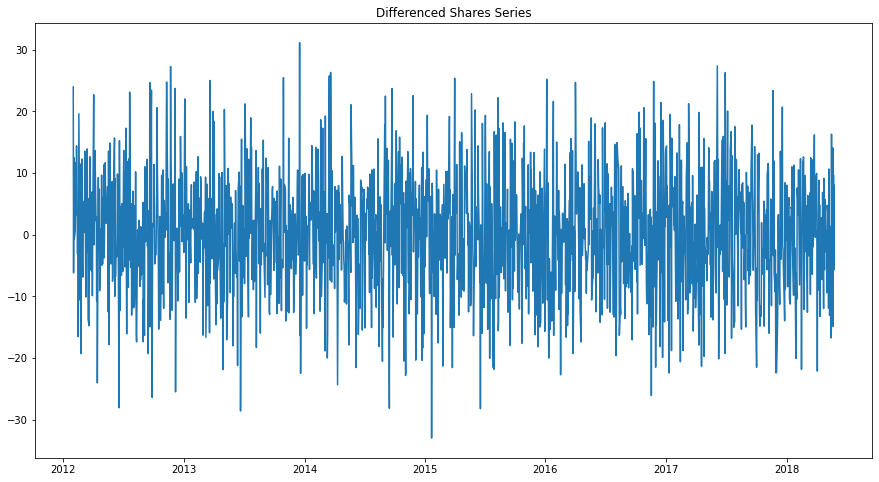

In [43]:
#no drift
shares_diff = shares_series.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_diff)
plt.title('Differenced Shares Series')
plt.show()

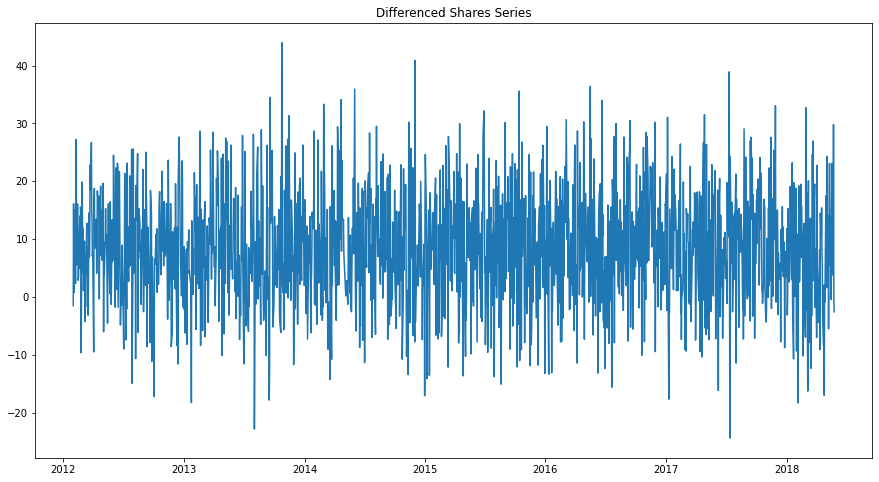

In [44]:
#drift
shares_drift_diff = shares_series_diff.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_drift_diff)
plt.title('Differenced Shares Series')
plt.show()

##### ARMA Model 

In [45]:
data_diff.head()

Date
2012-01-31   -0.001153
2012-02-01    0.010985
2012-02-02    0.002117
2012-02-03    0.016780
2012-02-06   -0.000800
Name: Price, dtype: float64

In [46]:
#set index to be business days
data_diff.index = pd.DatetimeIndex(data_diff.index).to_period('B')

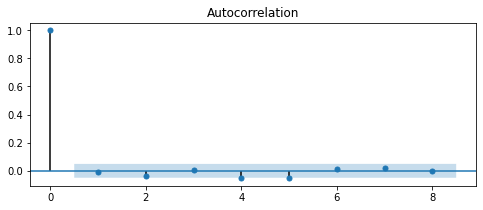

In [47]:
#plotting the ACF
#from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize = (8, 3))

plot_acf(data_diff, ax = ax, lags = 8);

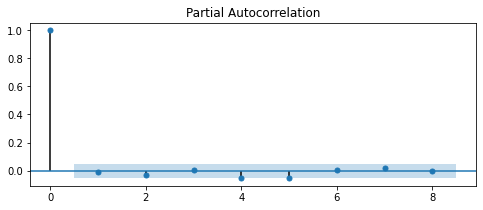

In [48]:
#plotting PACF
#from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize= (8, 3))
plot_pacf(data_diff, ax = ax, lags = 8);

In [49]:
#import arma
#from statsmodels.tsa.arima_model import ARMA

#fit an ARMA 1 model
mod_arma = ARMA(data_diff, order = (1,0))
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1592
Model:                     ARMA(1, 0)   Log Likelihood                5418.016
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 16 Nov 2020   AIC                         -10830.032
Time:                        19:58:55   BIC                         -10813.914
Sample:                    01-31-2012   HQIC                        -10824.045
                         - 05-25-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      1.899      0.058   -1.22e-05       0.001
ar.L1.Price    -0.0105      0.025     -0.417      0.677      -0.060       0.039
                                    Roots       

In [50]:
#ARMA 2
mod_arma = ARMA(data_diff, order = (2,2))
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1592
Model:                     ARMA(2, 2)   Log Likelihood                5422.044
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 16 Nov 2020   AIC                         -10832.088
Time:                        19:58:59   BIC                         -10799.852
Sample:                    01-31-2012   HQIC                        -10820.115
                         - 05-25-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      3.207      0.001       0.000       0.001
ar.L1.Price     0.3425      0.350      0.979      0.327      -0.343       1.028
ar.L2.Price     0.5700      0.334      1.709    

In [51]:
#ARMA 3
mod_arma = ARMA(data_diff, order = (4,3))
res_arma = mod_arma.fit()

print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 1592
Model:                     ARMA(4, 3)   Log Likelihood                5426.120
Method:                       css-mle   S.D. of innovations              0.008
Date:                Mon, 16 Nov 2020   AIC                         -10834.240
Time:                        19:59:03   BIC                         -10785.885
Sample:                    01-31-2012   HQIC                        -10816.280
                         - 05-25-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      2.354      0.019    6.31e-05       0.001
ar.L1.Price     1.1466      0.243      4.716      0.000       0.670       1.623
ar.L2.Price    -1.1957      0.095    -12.570    

> Attempted higher order numbers but received RunTime errors.

##### STOCKS TIME SERIES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


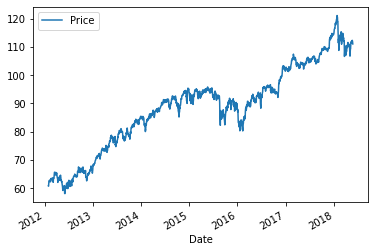

In [293]:
#replace any 0 values
stocks_ts = stocks[['Price']]
stocks_ts[stocks_ts == 0] = np.nan
stocks_ts = stocks_ts.ffill()

#select a shorter time period
stocks_ts = stocks_ts.loc['2012':'2018']
stocks_ts.plot()


In [294]:
#set index to datetime business days
stocks_ts.index = pd.DatetimeIndex(stocks_ts.index).to_period('B')

In [295]:
stocks_ts.head()

,Price
Date,
2012-01-30,60.73
2012-01-31,60.66
2012-02-01,61.33
2012-02-02,61.46
2012-02-03,62.50


In [296]:
#check for nulls
stocks_ts.isna().sum()

Price    0
dtype: int64

In [297]:
len(stocks_ts)

1593

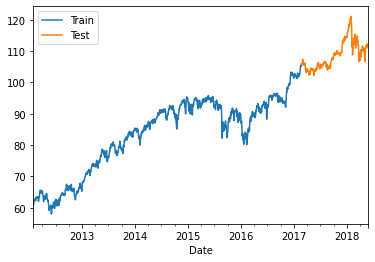

In [300]:
#train test split
int_split = round(len(stocks_ts)*.8) 
train = stocks_ts.iloc[:int_split]
test = stocks_ts.iloc[int_split:]

#visualize
fig, ax = plt.subplots()

train.plot(ax = ax)
test.plot(ax = ax);
L = plt.legend()
L.get_texts()[0].set_text('Train')
L.get_texts()[1].set_text('Test')

In [277]:
#from sklearn.preprocessing import MinMaxScaler
#instantiate scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train) 
X_test = scaler.transform(test) 

X_train

array([[0.05599666],
       [0.05453406],
       [0.06853322],
       ...,
       [0.98244881],
       [0.98495612],
       [1.        ]])

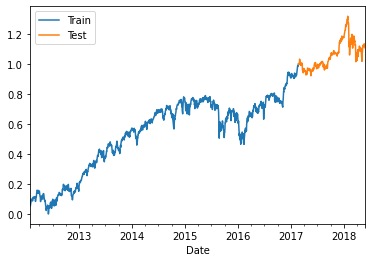

In [301]:
#convert to dataframe
X_train = pd.DataFrame(X_train, index = train.index, columns = ['Price'])
X_test = pd.DataFrame(X_test, index = test.index, columns = ['Price'])

fig, ax = plt.subplots()
X_train.plot(ax = ax)
X_test.plot(ax = ax)
L = plt.legend()
L.get_texts()[0].set_text('Train')
L.get_texts()[1].set_text('Test')

In [338]:
series[:1]

array([[0.05599666]])

In [302]:
#set feature number
n_features = X_train.shape[1]

series = X_train.values
series = series.reshape((len(series), n_features))
series

array([[0.05599666],
       [0.05453406],
       [0.06853322],
       ...,
       [0.98244881],
       [0.98495612],
       [1.        ]])

In [280]:
#from keras.preprocessing.sequence import TimeseriesGenerator

In [340]:
#number of timesteps for the sequences 
length = 50

#create time series generator
generator = TimeseriesGenerator(series, series, length, batch_size = 32)
generator


In [304]:
#testing out ind. output
ex_X, ex_y = generator[1]
ex_X.shape

(32, 50, 1)

In [305]:
#create test data
test_series = X_test.values 
test_series = test_series.reshape((len(test_series), n_features))
test_gen = TimeseriesGenerator(test_series, test_series, length, batch_size = 32)


In [284]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
# from tensorflow.keras import optimizers 
# from tensorflow.keras.regularizers import l2

In [306]:
#define generator
input_shape = (length, n_features)
#number of samples
print('Samples: %d' % len(generator))


Samples: 39


In [341]:
#define model
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = input_shape))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer= optimizers.Nadam(), loss = 'mse', metrics = ['mse'])

display(model.summary())
history = model.fit(generator, epochs = 20)


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 50, 64)            128       
_________________________________________________________________
dense_89 (Dense)             (None, 50, 32)            2080      
_________________________________________________________________
dense_90 (Dense)             (None, 50, 1)             33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1345 - mse: 0.1345
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0118 - mse: 0.0118
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 8/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 9/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038
Epoch 10/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039
Epoch 11/20
39/39 [==============================] - 0s 3ms/step - lo

In [322]:
results = pd.DataFrame(history.history)
results

,loss,mse
0,0.167694,0.167694
1,0.039522,0.039522
2,0.013687,0.013687
3,0.011355,0.011355
4,0.010124,0.010124
5,0.009575,0.009575
6,0.008552,0.008552
7,0.007951,0.007951
8,0.007100,0.007100
9,0.006353,0.006353


In [323]:
y_hat_test = model.predict(test_gen)

In [324]:
y_hat_test.shape

(269, 50, 1)

In [325]:
X_test[:length].shape

(50, 1)

In [326]:
X_test[length:]

,Price
Date,
2017-05-04,0.959256
2017-05-05,0.968868
2017-05-08,0.966360
2017-05-09,0.959883
2017-05-10,0.964480
...,...
2018-05-21,1.133932
2018-05-22,1.130380
2018-05-23,1.126410


ValueError: ignored

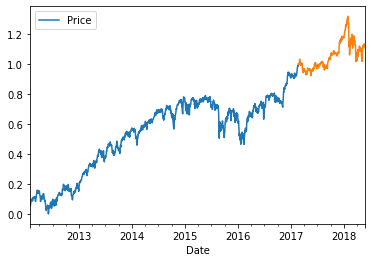

In [327]:
fig, ax = plt.subplots()
X_train.plot(ax = ax)
X_test['Price'].plot(ax = ax, label = 'Test')
ax.plot(X_test[:length].index, y_hat_test.flatten(), label = 'Predicted')
ax.set_title('S&P 500 - Model 1')
ax.legend();

In [329]:
#define model 2
model2 = Sequential()
model2.add(LSTM(units = 64, activation = 'relu', input_shape = input_shape))
model2.add(Dense(1))

model2.compile(optimizer= optimizers.Nadam(), loss = 'mse', metrics = ['mse'])

display(model2.summary())
history = model2.fit(generator, epochs = 20)


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/20
39/39 [==============================] - 1s 24ms/step - loss: 0.1870 - mse: 0.1870
Epoch 2/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0116 - mse: 0.0116
Epoch 3/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0023 - mse: 0.0023
Epoch 4/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0020 - mse: 0.0020
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0016 - mse: 0.0016
Epoch 6/20
39/39 [==============================] - 1s 23ms/step - loss: 0.0013 - mse: 0.0013
Epoch 7/20
39/39 [==============================] - 1s 24ms/step - loss: 9.9569e-04 - mse: 9.9569e-04
Epoch 8/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0012 - mse: 0.0012
Epoch 9/20
39/39 [==============================] - 1s 24ms/step - loss: 9.9401e-04 - mse: 9.9401e-04
Epoch 10/20
39/39 [==============================] - 1s 24ms/step - loss: 9.5417e-04 - mse: 9.5417e-04
Epoch 11/20
39/39 [================

In [330]:
results = pd.DataFrame(history.history)
results

,loss,mse
0,0.187017,0.187017
1,0.011618,0.011618
2,0.002316,0.002316
3,0.001971,0.001971
4,0.001601,0.001601
5,0.001291,0.001291
6,0.000996,0.000996
7,0.001247,0.001247
8,0.000994,0.000994
9,0.000954,0.000954


In [331]:
y_hat_test = model2.predict(generator)

In [332]:
y_hat_test.shape

(1224, 1)

In [335]:
X_test[length:].shape

(269, 1)

ValueError: ignored

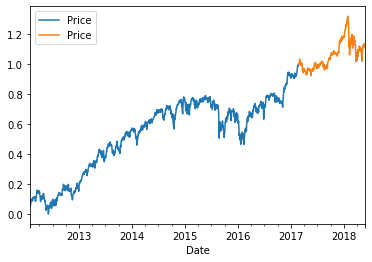

In [336]:
fig, ax = plt.subplots()
X_train.plot(ax = ax)
X_test.plot(ax = ax, label = 'Test')
ax.plot(X_test[:length].index, y_hat_test.flatten(), label = 'Predicted')
ax.set_title('S&P 500 - Model 1')
ax.legend();

##### SARIMA Model

- q - auto regressive part of the model. effect of past values into model. 
- d - amount of differnecing as it identifies the number of lag values to subtract from the current observation
- q - moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past.

In [ ]:
#import itertools

In [ ]:
#define p,d,q with value between 0 & 2
p = d = q = range(0, 3)

#generate diff combos of p, q, & d triplets
pdq = list(itertools.product(p, d, q))

#generate all diff combos of seasonal p, d, q, triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
#import statsmodels.api as sm

In [ ]:
# #initialize empty list
# answer = []
# #iterate through params
# for comb in pdq:
#   for combs in pdqs:
#     try:
#       mod = sm.tsa.statespace.SARIMAX(stocks_ts,
#                                       order = comb,
#                                       seasonal_order = combs,
#                                       enforce_stationarity = False, 
#                                       enforce_invertibility = False)
      
#       output = mod.fit(maxiter = 200)
#       answer.append([comb, combs, output.aic])
#       print('ARIMA{} x {}12: AIC Calculated = {}'.format(comb, combs, output.aic))
#     except:
#       continue

In [ ]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(answer, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
stocks_ts = stocks_ts.to_timestamp(freq = 'B')

In [ ]:
#plug in optimal parameter values
arima_model = sm.tsa.statespace.SARIMAX(stocks_ts, 
                                        order = (2,1,2),
                                        seasonal_order = (1,1,2,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

#fit model
output = arima_model.fit()

print(output.summary())

In [ ]:
output.plot_diagnostics(figsize = (15, 18))
plt.show()

###### Validating the SARIMA Model

In [ ]:
res = arima_model.filter(output.params)

In [ ]:
predict = res.get_prediction()
pred_conf = predict.conf_int()

In [ ]:
#get predictions
pred = output.get_prediction(start = pd.to_datetime('2017-06-02'), 
                             #end = pd.to_datetime('2018-05-07'), 
                             dynamic = False)
pred_conf = pred.conf_int()

In [ ]:
stocks_ts.head(-10)

In [ ]:
rcParams['figure.figsize'] = 15, 6

#plot observed
ax = stocks_ts['2017-05-26':].plot(label = 'Observed')

#plot predicted
pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast', alpha = 0.9)

#set axes labels
ax.set_xlabel('Date')
ax.set_title('Real and Forecasted S&P 500 Price Values')
ax.set_ylabel('S & P 500 Stock Prices')
plt.legend()
plt.show()

In [ ]:
#real and predicted values
stocks_forecasted = pred.predicted_mean.values
stocks_truth = stocks_ts['2017-06-02':].values

#compute mse
mse = ((stocks_forecasted - stocks_truth) ** 2).mean()
print('MSE is {}'.format(round(mse, 2)))

###### Dynamic Forecasting

In [ ]:
pred_dynamic = output.get_prediction(start = pd.to_datetime('2017-06-02'),
                                     dynamic = True, 
                                     full_results = True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [ ]:
stocks_forecasted = pred.predicted_mean

In [ ]:
ax = stocks_ts['2017-06-02':].plot(label = 'Observed', figsize = (15, 8))
pred_dynamic.predicted_mean.plot(label = 'Dynamic Forecast', ax = ax)

# ax.fill_between(pred_dynamic_conf.index,
#                 pred_dynamic_conf.iloc[:, 0],
#                 pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-05-11'), 
                 stocks_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('S&P 500 Price')

plt.legend()
plt.show()

In [ ]:
#real and predicted values
stocks_forecasted = pred_dynamic.predicted_mean.values
stocks_truth = stocks_ts['2017-06-02':].values

#compute mse
mse = ((stocks_forecasted - stocks_truth) ** 2).mean()
print('MSE is {}'.format(round(mse, 2)))

###### Producing and Visualizing Forecasts

In [ ]:
#forecast 365 steps into future
prediction = output.get_forecast(steps = 365)

#get conf intervals
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals
ax = stocks_ts.plot(label='Observed', figsize=(15, 8))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('S&P 500 Price')

plt.legend()
plt.show()

#Interpret

#Summary

#Future Work